In [ ]:
# Task 2: Pizza Delivery Time Performance Analysis
## Business Context
Diminos promises pizza delivery within 31 minutes. If the delivery exceeds
this time, the pizza is free for the customer, leading to revenue loss.
## Objective
The objective of this analysis is to evaluate delivery performance using
the 95th percentile delivery time metric and provide insights to help
the store maintain its franchise standards.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [7]:
df['delivery_time_minutes'] = (
    df['order_delivered_at'] - df['order_placed_at'] ).dt.total_seconds() / 60
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_minutes
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [8]:
df['delivery_time_minutes'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_minutes, dtype: float64

In [9]:
percentile_95 = np.percentile(df['delivery_time_minutes'], 95)
percentile_95

np.float64(27.261043996666658)

In [ ]:
The 95th percentile delivery time represents the time within which
95% of the orders are delivered. This value is compared against
the 31-minute benchmark set by Diminos.

In [10]:
if percentile_95 < 31:
    result = "The store meets the Diminos performance criteria."
else:
    result = "The store does NOT meet the Diminos performance criteria."
result

'The store meets the Diminos performance criteria.'

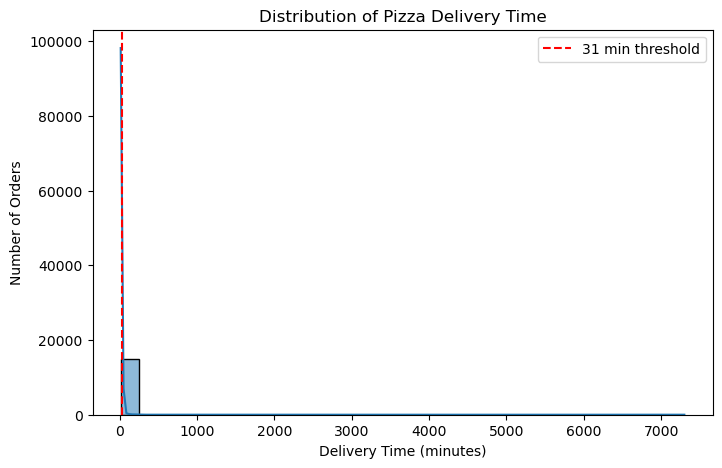

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_time_minutes'], bins=30, kde=True)
plt.axvline(31, color='red', linestyle='--', label='31 min threshold')
plt.title("Distribution of Pizza Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

In [12]:
late_orders = df[df['delivery_time_minutes'] > 31]
late_orders.shape[0]

557

In [ ]:
Orders exceeding 31 minutes are identified as late deliveries.
These cases directly impact customer satisfaction and revenue.

In [ ]:
The analysis highlights the importance of monitoring delivery time
performance using percentile-based metrics. By addressing operational
inefficiencies and focusing on late deliveries, Kanav can improve
store performance and meet Diminos franchise requirements.